In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


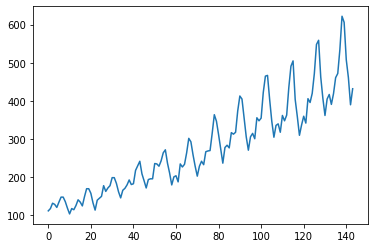

In [5]:
import matplotlib.pyplot as plt
plt.plot(df.iloc[:,1])

# Scaling

### LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [6]:
from sklearn.preprocessing import MinMaxScaler
df.iloc[:,1]

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [8]:
df.shape

(144, 1)

In [10]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [11]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [12]:
test_size=len(df)-training_size

In [13]:
training_size, test_size

(93, 51)

In [14]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [15]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [25]:
X_test.shape,X_train.shape

((46, 4), (88, 4))

In [26]:
y_test.shape

(46,)

In [27]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [28]:
X_train.shape

(88, 4, 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1,verbose=1)

Train on 88 samples, validate on 46 samples
Epoch 1/100
88/88 [==============================] - 4s 41ms/sample - loss: 0.0168 - val_loss: 0.0327
Epoch 2/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0065 - val_loss: 0.0331
Epoch 3/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0074 - val_loss: 0.0258
Epoch 4/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0054 - val_loss: 0.0317
Epoch 5/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0059 - val_loss: 0.0298
Epoch 6/100
88/88 [==============================] - ETA: 0s - loss: 0.006 - 1s 6ms/sample - loss: 0.0055 - val_loss: 0.0383
Epoch 7/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0055 - val_loss: 0.0271
Epoch 8/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0053 - val_loss: 0.0248
Epoch 9/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0049 - val_loss: 0.0274
Epoch 10/100
88/88 [==

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
test_predict

array([[0.41291153],
       [0.38457155],
       [0.57879525],
       [0.42852104],
       [0.5282173 ],
       [0.7107168 ],
       [0.68178374],
       [0.6548226 ],
       [0.44585454],
       [0.42263943],
       [0.35305488],
       [0.5153903 ],
       [0.44367403],
       [0.40654778],
       [0.58510643],
       [0.42025644],
       [0.55623215],
       [0.733923  ],
       [0.74455184],
       [0.71803   ],
       [0.34290314],
       [0.51140535],
       [0.31142905],
       [0.5196262 ],
       [0.50557214],
       [0.4359936 ],
       [0.7059428 ],
       [0.4676137 ],
       [0.6865556 ],
       [0.73767793],
       [0.8877535 ],
       [0.69066197],
       [0.4224221 ],
       [0.5216587 ],
       [0.3548295 ],
       [0.6529823 ],
       [0.5376292 ],
       [0.5090233 ],
       [0.67484486],
       [0.6826318 ],
       [0.6457321 ],
       [0.9101049 ],
       [0.931906  ],
       [0.5883444 ],
       [0.4851647 ],
       [0.5095917 ]], dtype=float32)

In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
test_predict

array([[317.88818],
       [303.20807],
       [403.81595],
       [325.9739 ],
       [377.61658],
       [472.1513 ],
       [457.164  ],
       [443.19812],
       [334.95267],
       [322.92725],
       [286.88245],
       [370.97217],
       [333.82315],
       [314.59177],
       [407.08514],
       [321.69284],
       [392.12827],
       [484.17215],
       [489.67786],
       [475.93954],
       [281.62384],
       [368.908  ],
       [265.32025],
       [373.16638],
       [365.88638],
       [329.8447 ],
       [469.67838],
       [346.2239 ],
       [459.63583],
       [486.1172 ],
       [563.85626],
       [461.7629 ],
       [322.81467],
       [374.21924],
       [287.8017 ],
       [442.24484],
       [382.49194],
       [367.67407],
       [453.56964],
       [457.60327],
       [438.48926],
       [575.4343 ],
       [586.7273 ],
       [408.76242],
       [355.31534],
       [367.9685 ]], dtype=float32)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.8435312546515

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

403.3439326189742

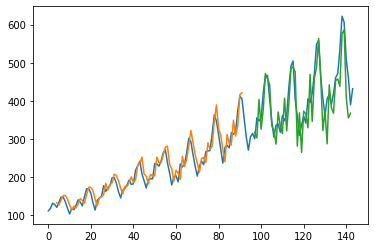

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()